# Arxivtrends: A Complete Introduction


Nowadays many data scientist have graduate degrees in hard science subjects (mathematics, physics, computer science, biology) and for very few of them the option of an academic career has been out of question since the onset of their studies. Even a quick google search on the topic will show tons of blog posts, magazine columns and statistics about the massive, ever-mounting flow of people - not only graduates - from academia to, say, the tech industry. The motivations adduced for what is still for many a career change, besides the undeniably wide gulf between both average retribution and career advancement rates in the two sectors, revolve around a range of increasingly remarked-upon concerns about the current academic system. For example the increase of the average number of candidates for postdoc positions - still absolutely necessary to start climbing the academic ladder - and the downward projection of future tenure track positions openings. As a 2018 UBC graduate in mathematics I can vouch for the veracity of this state of things and add other reasons for having to consider an academic career now as a less convenient option compared to just 10 or 15 years ago:

1. the hyper-competitiveness of the modern academic selection & recruitment system;
2. the consequent precocious hyper-specialization young researchers are forced to undergo.

Both PhD candidates in the disciplines I mentioned and more experienced professors who are - or have been - members of recruitment boards of universities and research institution can easily confirm: if you earn your PhD with only one or two publication on your behalf, you're not exactly killing it out there... There is just going to be plenty of candidates for the postdoc opportunities you are interested in, fresh off their doctoral studies and with 4, 5 or more preprints on the arxiv. Given that modern academia exists only in publish-or-perish mode, these candidates are inevitably going to have the upper hand. Therefore, in order to roll up a good initial capital of papers to invest in the academic market, the best strategy is to churn out narrow results on as many niche subjects as possible, more mainstream subjects being notoriously tougher (it's difficult to say something new and meaningful on a problem that has already been studied by many experienced researchers!).

"But that's just how competition works, it's just the way of it!", the well-known and well-established line of thinking goes. Nevertheless, some voices from within the research world have already expressed a well thought-through criticism towards the current system. Some have openly decried the emphasis on meeting prescribed numerical standards in terms of publications rather than contributing to the long-term advancement of research by means of a deeper and more slowly-matured perspective (see for example [here](https://www.google.ca/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=2ahUKEwi-t5Oau8flAhVB2KQKHevoDz0QFjAAegQIARAC&url=https%3A%2F%2Fwww.freewebs.com%2Fcvdegosson%2Fconnes-interview.pdf&usg=AOvVaw2iLVEN_5VUkgeG3O8ldKTx) and [here](https://www.goodreads.com/book/show/108939.The_Trouble_with_Physics)).

I totally espouse this concerns out of familiarity with the modern academic system. My interest for this topic and desire to explore it more broadly, beyond the boundaries of my own experience and the anecdotical at-one-remove one I gathered from collegues and friends, is what led me to this small data science project.


## Assumptions, strategy, methods

My goal was first to find some quantitative indicator of hyper-specialization in the research fields I am most familiar with, then verify whether some increase trend in that sense could be detectable. Moreover I needed a reliable data source, that is reasonably apt to help me explore the phenomenon.

The choice of my data source - namely, arXiv - came as somewhat natural. ArXiv is the most famous worldwide repository of electronic preprints in mathematics and its records in the research fields of my concern span nearly thirty years. Having been an absolutely mainstream resource for at least 20 years, I could consider the assumption of statistical representativeness of its data not unreasonable.

As to the quantitative variables to study, I considered the number of authors per preprint and the mean number of both preprint pages and authors per year. The number of authors of a preprint, in particular, can be regarded to a certain degree as reflective of the level of specialization of the content of the preprint. Each author of a paper contributes to its scientific results by means of his own specific expertise, which the other authors employed and combined with their own to write the preprint. The working hypothesis is, then: the more authors, the higher the likelihood for the reader's mathematical background to need to be advanced and specialized. In this project we'll  restrict these numerical indicators to a few selected research fields in mathematics and analyze their trends over the past three decades of research.

The rest of this notebook is dedicated to showing a complete example of use of the package for the extraction and visualization of the data relative to one of the research fields currently available. For example partial differential equations of elliptic type, abbreviated as 'Elliptic PDE'.


## An example of use of Arxivtrends

As outlined in the README file, lets first create an instance of the class ```Scraper``` for the research field we chose:

In [10]:
import arxivtrends

scraper = arxivtrends.Scraper(macro_field='Elliptic PDE')

The query was successful, parsing can begin now!


The instance ```scraper``` receives the results returned from a call to the arXiv api that is specific for the research field we chose. Now we are ready to parse ```scraper```  and extract the information we want for each preprint: year of publication, list of authors and number of pages:

In [19]:
output_df = scraper.scrape()

scraping started!
fetching completed in 4 hours, 4 minutes and 34 seconds
Total number of papers scraped: 4484


Remark: the parsing took several hours because the arXiv API's [terms of use](https://arxiv.org/help/api/tou) sets limits on the requests rate (in particular, no more than one request every three seconds, limited to a single connection at a time.) and explicitly asks not to overcome these limits. Moreover, in order to visualize the progression of the parsing process, ```scrape()``` prints out an update status message every block of 100 preprints. Here nevetheless, for the sake of brevity, I commented out that functionality.

Now that the parsing is complete we have a pandas DataFrame, ```output_df```, containing our data cleaned and ready to be used for visualization and statistical analysis. However, ```scrape()``` also saves the same data into a .csv fle - ```Arxivtrends_preprints__Elliptic_PDE__2019-10.csv```. We can now apply any data manipulation techniques to the dataframe ```output_df``` and later, in case we need the information we had at the beginning, can call the function ```load_data()```:

In [25]:
output_df = load_data('Arxivtrends_preprints__Elliptic_PDE__2019-10.csv')

data loaded!


Finally we can get some visual insights from the data we collected and cleaned. For example, let's see the number of arXiv preprints in elliptic equations with at least three authors:

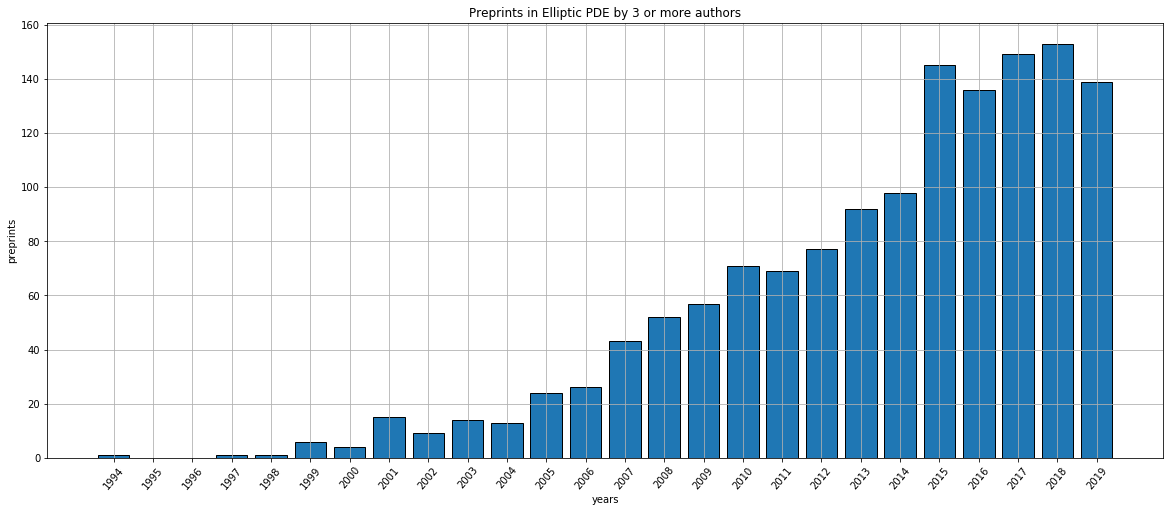

In [37]:
%matplotlib inline
plot_N_authors_papers(output_df, 3)

Now, if we keep in mind that

1. modern theoretical mathematics in general - and the research fields we are concerned with in particular - are split into a myriad of areas, problems, theories, subfields and sub-subfields, and that

2. the norm is preprints with one author or two authors,

a collaboration of three or more researchers implies a multiple overlap of competences and connotes an appreciable level of specialization.
Let's see the number of arXiv preprints in elliptic equations with at least four authors:

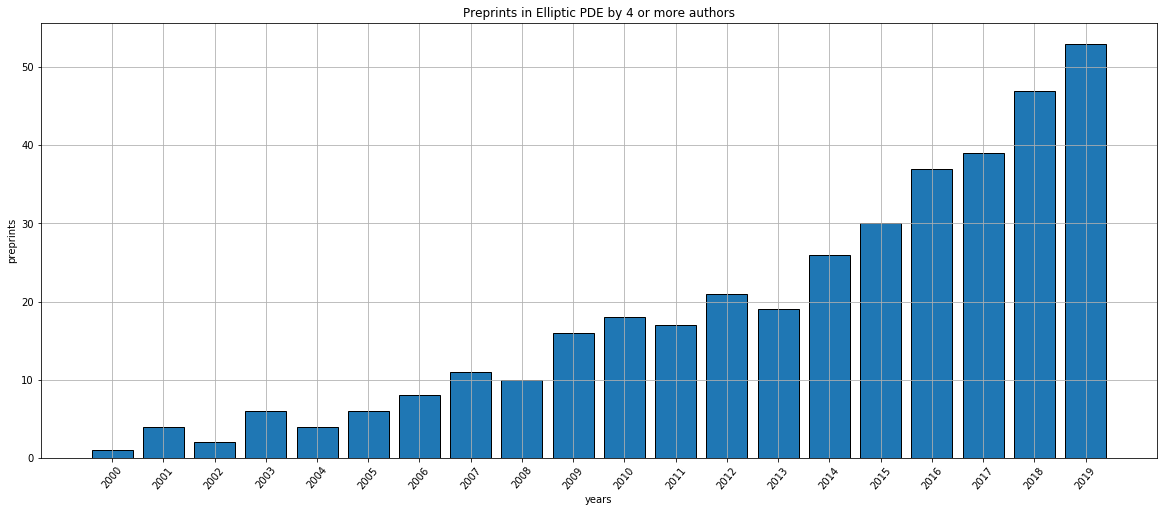

In [38]:
plot_N_authors_papers(output_df, 4)

The trends clearly match and seem to suggest a steady increase of both the degree of collaboration among researchers and the level of interconnectedness of their areas of competence.
Of course this conclusion will came as no surprise to any competent mathematician, the unity of mathematics as a whole having been repeatedly proven by the emergence of many deep and important connections among its various branches over the past centuries and until now. But it's not necessarily good news for the beginner, there being such an uphill climb ahead to master even just one area of research. These considerations might well influence a career decision.


Another feature of Arxivtrends is the possibility of visualizing the trend in both mean number of authors and mean number of pages over the range of years covered by the data we have. The method we need is ```mean_authors_vs_pages()```:

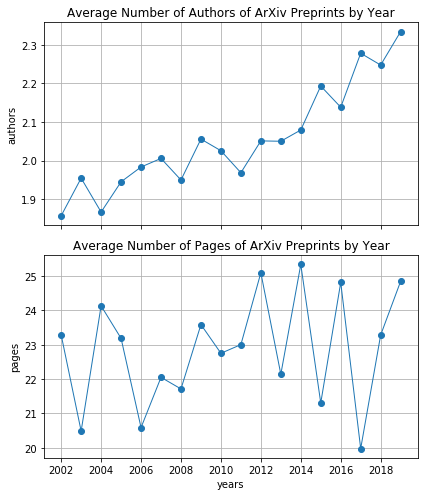

In [40]:
mean_authors_vs_pages(output_df)

One one hand, there is a clearly discernible growth for the mean number of authors (though the values remain close to 2 due to the easily verifiable majority of single-authored preprints). On the other hand, the mean number of pages does not seem to increase at all but rather to oscillate between 20 and 25. In this regard, there seem to be no difference whatsoever between, say, the decades 2000-2009 and 2010-2019. This fact suggests that, regardless of the aforementioned surge in research collaboration and interconnection of research areas, preprints have not become longer than how they were on average 10 or 20 years ago. 

But what if we were interested in some quantitative indicator of the average scientific production on the part of the researchers actively working in the field of elliptic equations? Arxivtrends attempts to provide an answer to such a question by using the mean number of arXiv preprints submitted on a yearly basis by the authors whose first submission dates back to a specific year. In other words we

1. select an year - say, 2005 - and consider only the researchers whose first arXiv preprint was submitted in 2005;

2. calculate the average yearly research production - quantified in terms of the mean number of preprints by these researchers year by year.

This indicator can be thought of as a quantitative overall research performance measurement, reflecting the level of competitiveness within the field a researcher should live up to. Every researcher who started publishing papers in 2004 or 2005 could easily compare his / her scientific production to the one obtained by averaging over all his / her colleagues.

The arxivscraper method for visually showing this trend is ```show_average_productivity()```, but first we have to reorder our data in a form that is more suitable to the needs of the analysis we want to conduct. We use the method ```get_productivity_database()``` to create a second dataframe, ```df_authors```, from  ```output_df``` according to the schema below:

<img src="table_shift.png">

In [50]:
authors_df = get_productivity_database(output_df)

productivity database ready!


In other words, we extract all the authors from the lists in the column ```'authors'``` of ```output_df``` and, for each year, display how many preprints they submitted in that year.

As we have done for ```load_data()```, the new dataframe is also saved into a .csv fle - ```Arxivtrends_authors__Elliptic_PDE__2019-10.csv```, so we can even load the data from file:

In [53]:
authors_df = load_authors_data('Arxivtrends_authors__Elliptic_PDE__2019-10.csv')

data loaded into the productivity database


Once we choose the specific year - or years: say, 2005, 2010 and 2013 - we just need to apply the method ```show_average_productivity()```:

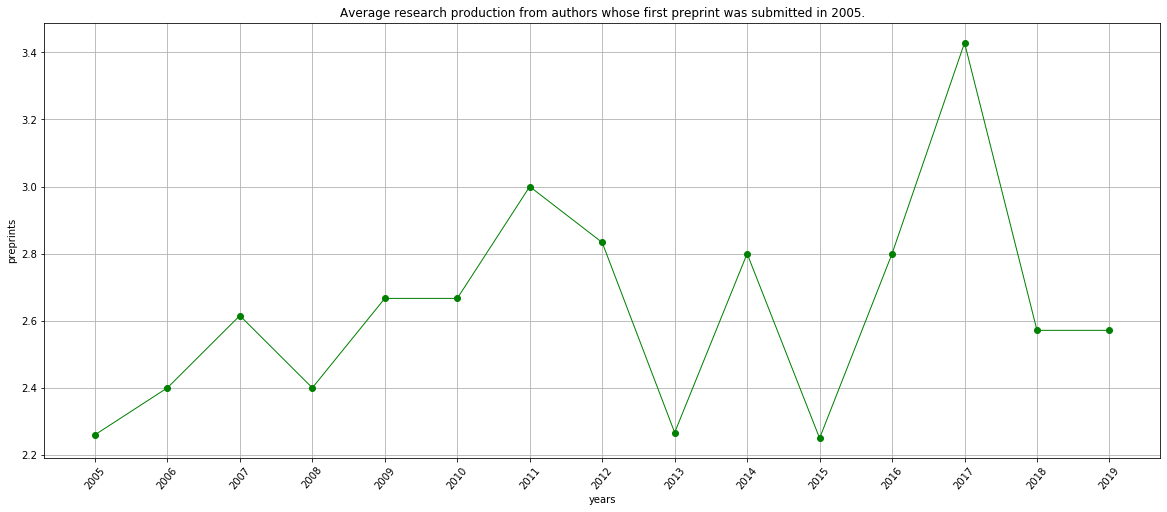

In [58]:
show_average_productivity(authors_df, 2005)

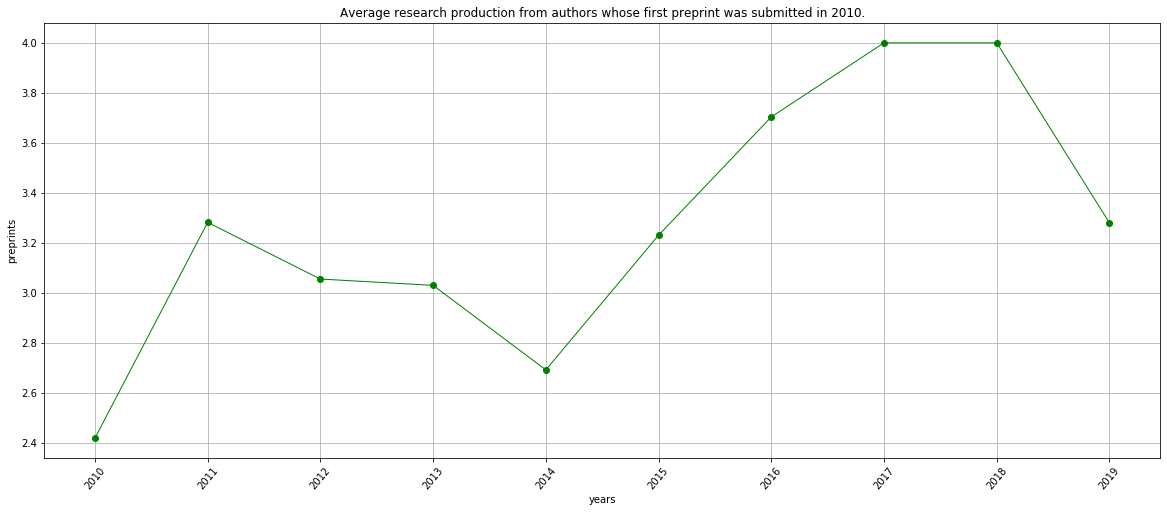

In [59]:
show_average_productivity(authors_df, 2010)

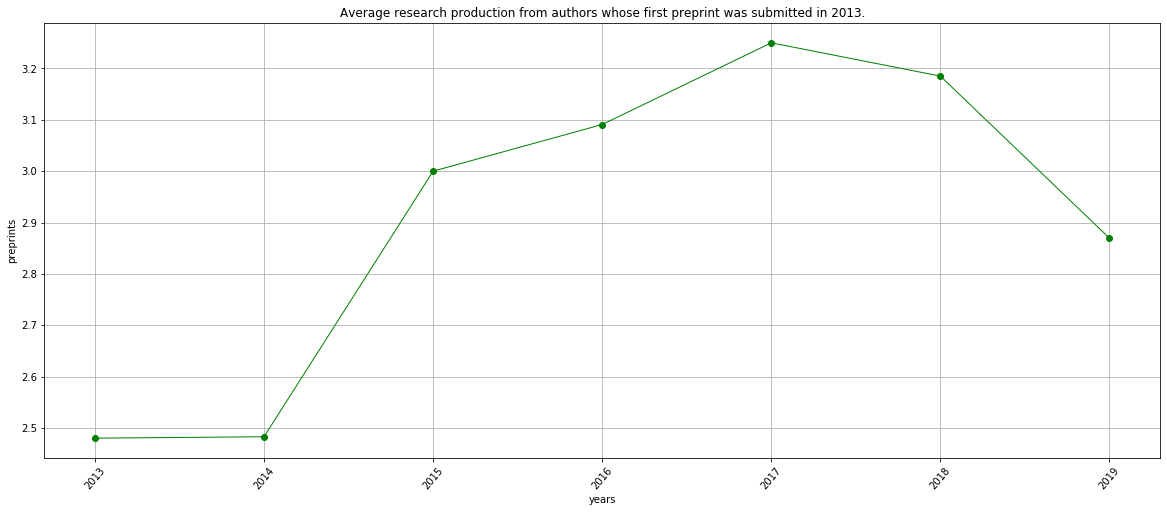

In [61]:
show_average_productivity(authors_df, 2013)

The motivation for restricting the average to the authors who started to be active in research during a specific year is clear: their yearly number of submitted preprints and the analogous indicators for the research activity of either more senior - and typically more productive - colleagues or those who entered the academic fray later are not truly statistically comparable. In terms of scientific production, mixing up all these data together would inevitably lead to an unmeaningful analysis.